### Automatyczne wyznaczanie progu binaryzacji

In [37]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

Określanie optymalnego progu binaryzacji wg Otsu przebiega w następujący sposób: algorytm sprawdza wszystkie możliwe wartości graniczne i oblicza wariancję $\sigma^{2}_{i}$ dla każdej z dwóch klas punktów tj. poniżej i powyżej progu.

Minimalizaowana jest wartość ważonej wariancji:

$\sigma^{2}_{w} = w_{1}(t) \cdot \sigma^{2}_{1} + w_{2}(t) \cdot \sigma^{2}_{2}$

Minimalizacja wariancji dwóch klas w ten sposób jest tym samym co maksymalizacja wariancji między klasami. Proces ten jest kosztowny obliczeniowo, ponieważ konieczne jest przeszukanie całej przestrzeni możliwych wartości progowych.

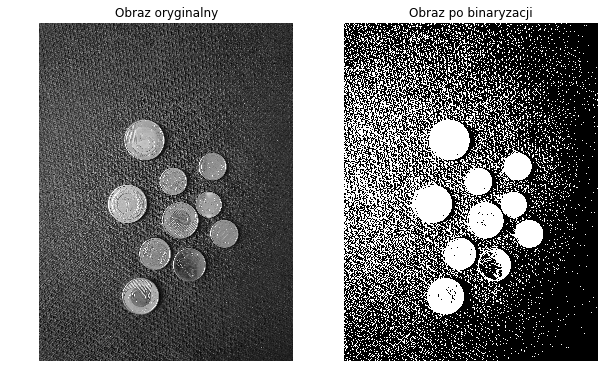

In [38]:
from skimage import data
from skimage import io, color, img_as_ubyte, util
import cv2

url = 'img3.jpg'
im = io.imread(url)
im = color.rgb2gray(im)
im = img_as_ubyte(im) 


th = 80
th, bim = cv2.threshold(im, thresh=th, maxval=255, type=cv2.THRESH_BINARY)

show2imgs(im, bim, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(10,10))

Binaryzacja z progiem wyznaczonym automatycznie z wykorzystaniem biblioteki **skimage**. 

Ilustracja dwóch konwencji:
1. Kolor czarny oznacza obiekty a biały tło (standardowe podejście).
2. Kolor biały oznacza obiekty a czarny tło.

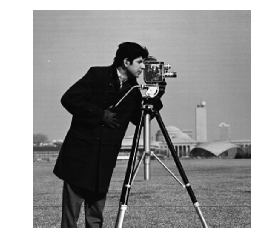

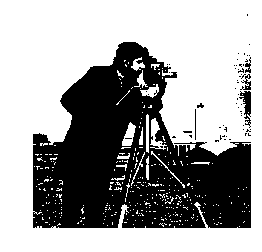

Próg binaryzacji:  87


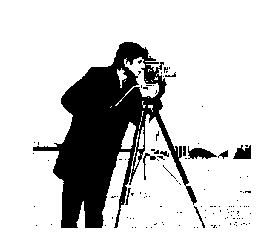

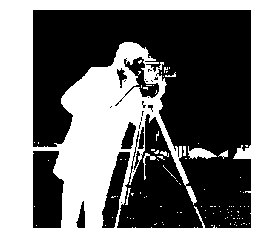

In [39]:
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage import filters

image = camera()
plt.imshow(image, cmap="gray")
plt.axis('off')
plt.show()

th = 145
plt.imshow(image > th, cmap="gray")
plt.axis('off')
plt.show()

th = filters.threshold_otsu(image)
print("Próg binaryzacji: ", th)

plt.imshow(image > th, cmap="gray")
plt.axis('off')
plt.show()

plt.imshow(image < th, cmap="gray")
plt.axis('off')
plt.show()

skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_yen
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_otsu
118


NameError: name 'threshold_minimum' is not defined

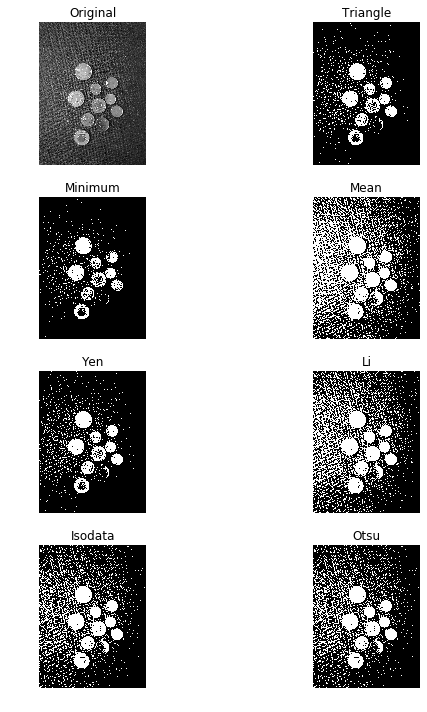

In [44]:
import warnings
from skimage import io, color, img_as_ubyte, util
warnings.filterwarnings('ignore')

from skimage.filters import try_all_threshold

url = 'img3.jpg'
im = io.imread(url)
im = color.rgb2gray(im)
im = img_as_ubyte(im) 


fig, ax = try_all_threshold(im, figsize=(10, 10), verbose=True)


from skimage.filters import threshold_yen


th = threshold_yen(im)
print(th)
img = threshold_minimum(im)
print(img)

plt.figure()
plt.imshow(im > th, cmap="gray")
plt.axis('off')
plt.show()

In [ ]:
from skimage.filters import threshold_li

th = threshold_li(coins())
print(th)
im = coins() < 100

plt.imshow(im, cmap="gray")
plt.axis('off')
plt.show()


Ta sama binaryzacja, ale z konwersją obrazu po binaryzacji do wartości rzeczywistych tj. [0,1].

In [ ]:
from skimage import img_as_float

plt.imshow(img_as_float(image > th), cmap="gray")
plt.axis('off')
plt.show()

plt.imshow(img_as_float(image < th), cmap="gray")
plt.axis('off')
plt.show()

Przykładowa funkcja zliczająca ile na obrazie po binaryzacji jest punktów czarnych a ile białych. Podobne podejście można wykorzystać podczas tworzenia funkcji obliczającej histogram.

In [ ]:
def count_black_white(image):
    
    m, n  = image.shape
    
    black = 0
    white = 0
    
    for i in range(m):
        for j in range(n):
            if image[i, j] == 1:
                white += 1
            elif image[i, j] == 0:
                black += 1
    
    return black, white


image = text()
binary = image > 100
a, b = count_black_white(binary)
print(a, b)

import numpy as np
print(np.sum(binary==0), np.sum(binary==1))

plt.imshow(binary, cmap="gray")
plt.axis('off')
plt.show()

Wywołanie funkcji **count_black_white()** i prezentacja wyników dla róznych obrazów testowych z biblioteki **skimage**.

In [ ]:
from skimage import data
import numpy as np

th = 90

print("Punkty białe i czarne: ", count_black_white(data.camera() > th)," Wszystkie punkty: ", np.array(data.camera()).size)
print("Punkty białe i czarne: ", count_black_white(data.camera() <= th)," Wszystkie punkty: ", np.array(data.camera()).size)
print("Punkty białe i czarne: ", count_black_white(data.camera() < th)," Wszystkie punkty: ", np.array(data.camera()).size)

print("Punkty białe i czarne: ", count_black_white(data.moon() > th)," Wszystkie punkty: ", np.array(data.moon()).size)
print("Punkty białe i czarne: ", count_black_white(data.text() > th)," Wszystkie punkty: ", np.array(data.text()).size)